[2018-05-20 11:51:26.350548] Url Request Success
{
    "response": {
        "body": {
            "items": {
                "item": {
                    "ed": "방한외래관광객",
                    "edCd": "E",
                    "natCd": 130,
                    "natKorNm": "일  본",
                    "num": 196301,
                    "rnum": 1,
                    "ym": 201101
                }
            },
            "numOfRows": 10,
            "pageNo": 1,
            "totalCount": 1
        },
        "header": {
            "resultCode": "0000",
            "resultMsg": "OK"
        }
    }
}
일본_201101 : 196301
[2018-05-20 11:51:26.375564] Url Request Success
{
    "response": {
        "body": {
            "items": {
                "item": {
                    "ed": "방한외래관광객",
                    "edCd": "E",
                    "natCd": 130,
                    "natKorNm": "일  본",
                    "num": 221318,
                    "rnum": 1,
                    "ym": 20

[2018-05-20 11:51:26.775830] Url Request Success
{
    "response": {
        "body": {
            "items": {
                "item": {
                    "ed": "방한외래관광객",
                    "edCd": "E",
                    "natCd": 130,
                    "natKorNm": "일  본",
                    "num": 346950,
                    "rnum": 1,
                    "ym": 201208
                }
            },
            "numOfRows": 10,
            "pageNo": 1,
            "totalCount": 1
        },
        "header": {
            "resultCode": "0000",
            "resultMsg": "OK"
        }
    }
}
일본_201208 : 346950
[2018-05-20 11:51:26.795846] Url Request Success
{
    "response": {
        "body": {
            "items": {
                "item": {
                    "ed": "방한외래관광객",
                    "edCd": "E",
                    "natCd": 130,
                    "natKorNm": "일  본",
                    "num": 308882,
                    "rnum": 1,
                    "ym": 20

[2018-05-20 11:51:29.533669] Url Request Success
{
    "response": {
        "body": {
            "items": {
                "item": {
                    "ed": "방한외래관광객",
                    "edCd": "E",
                    "natCd": 130,
                    "natKorNm": "일  본",
                    "num": 215050,
                    "rnum": 1,
                    "ym": 201312
                }
            },
            "numOfRows": 10,
            "pageNo": 1,
            "totalCount": 1
        },
        "header": {
            "resultCode": "0000",
            "resultMsg": "OK"
        }
    }
}
일본_201312 : 215050
[2018-05-20 11:51:29.559686] Url Request Success
{
    "response": {
        "body": {
            "items": {
                "item": {
                    "ed": "방한외래관광객",
                    "edCd": "E",
                    "natCd": 130,
                    "natKorNm": "일  본",
                    "num": 172077,
                    "rnum": 1,
                    "ym": 20

[2018-05-20 11:51:29.959953] Url Request Success
{
    "response": {
        "body": {
            "items": {
                "item": {
                    "ed": "방한외래관광객",
                    "edCd": "E",
                    "natCd": 130,
                    "natKorNm": "일  본",
                    "num": 148632,
                    "rnum": 1,
                    "ym": 201508
                }
            },
            "numOfRows": 10,
            "pageNo": 1,
            "totalCount": 1
        },
        "header": {
            "resultCode": "0000",
            "resultMsg": "OK"
        }
    }
}
일본_201508 : 148632
[2018-05-20 11:51:29.981967] Url Request Success
{
    "response": {
        "body": {
            "items": {
                "item": {
                    "ed": "방한외래관광객",
                    "edCd": "E",
                    "natCd": 130,
                    "natKorNm": "일  본",
                    "num": 157313,
                    "rnum": 1,
                    "ym": 20

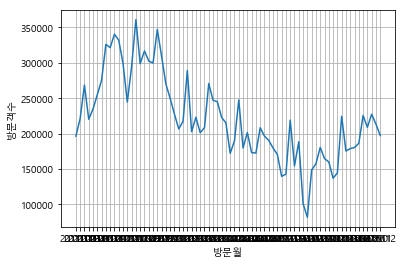

In [4]:
import os
import sys
import urllib.request
import datetime
import time
import json
from config import *

import matplotlib.pyplot as plt
import matplotlib
from matplotlib import font_manager, rc

def get_request_url(url):
    
    req = urllib.request.Request(url)
    
    try: 
        response = urllib.request.urlopen(req)
        if response.getcode() == 200:
            print ("[%s] Url Request Success" % datetime.datetime.now())
            return response.read().decode('utf-8')
    except Exception as e:
        print(e)
        print("[%s] Error for URL : %s" % (datetime.datetime.now(), url))
        return None

#[CODE 1]
def getNatVisitor(yyyymm, nat_cd, ed_cd):
    
    end_point = "http://openapi.tour.go.kr/openapi/service/EdrcntTourismStatsService/getEdrcntTourismStatsList"
    
    parameters = "?_type=json&serviceKey=" + access_key
    parameters += "&YM=" + yyyymm
    parameters += "&NAT_CD=" + nat_cd
    parameters += "&ED_CD=" + ed_cd
    
    url = end_point + parameters
    
    retData = get_request_url(url)
    
    if (retData == None):
        return None
    else:
        return json.loads(retData)

def main():

    jsonResult = []

    #중국: 112 / 일본: 130 / 미국: 275
    national_code = "130"
    ed_cd = "E"

    nStartYear = 2011
    nEndYear = 2017

    for year in range(nStartYear, nEndYear):
        for month in range(1, 13):

            yyyymm = "{0}{1:0>2}".format(str(year), str(month))

            jsonData = getNatVisitor(yyyymm, national_code, ed_cd)
            
            print (json.dumps(jsonData,
                        indent=4, sort_keys=True,
                        ensure_ascii=False))

            if (jsonData['response']['header']['resultMsg'] == 'OK'):
                krName = jsonData['response']['body']['items']['item']["natKorNm"]
                krName = krName.replace(' ', '')
                iTotalVisit = jsonData['response']['body']['items']['item']["num"]
                print('%s_%s : %s' %(krName, yyyymm, iTotalVisit))
                jsonResult.append({'nat_name': krName, 'nat_cd': national_code,
                                 'yyyymm': yyyymm, 'visit_cnt': iTotalVisit})

    cnVisit = []
    VisitYM = []
    index = []
    i = 0
    for item in jsonResult:
        index.append(i)
        cnVisit.append(item['visit_cnt'])
        VisitYM.append(item['yyyymm'])
        i = i + 1
            
    with open('%s(%s)_해외방문객정보_%d_%d.json' % (krName, national_code, nStartYear, nEndYear-1), 'w', encoding='utf8') as outfile:
        retJson = json.dumps(jsonResult,
                        indent=4, sort_keys=True,
                        ensure_ascii=False)
        outfile.write(retJson)
    

    #[CODE 2]
    font_location = "c:/Windows/fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=font_location).get_name()
    matplotlib.rc('font', family=font_name)

    plt.xticks(index, VisitYM)
    plt.plot(index, cnVisit)
    plt.xlabel('방문월')
    plt.ylabel('방문객수')
    plt.grid(True)
    plt.show()           
    
if __name__ == '__main__':
    main()